In [84]:
# this block initializes the structs for storing acitivities and patients

import os
from datetime import datetime
import pandas as pd
import time
from patient import Patient, Activity
import jsonpickle
import matplotlib.pyplot as plt
import plotly.express as px


In [85]:
src = './Data/HOA_Data'
# to-do

excel = './Data/HOA_Data/chi_unix.xlsx'
excel = pd.read_excel(excel)


activities = []
ids = []
patients = []

for i in range(len(excel)):
    row = excel.iloc[i]
    if row['Subject Index'] not in ids:
        ids.append(row['Subject Index'])

for id in ids: #flagging dupes for merging
    if len(id) >= 12:
        print(id)

temp_hold= []

for id in ids:
    # fetch all activities for each patients
    activities = []
    for i in range(len(excel)):
        act = excel.iloc[i]
        if act['Subject Index'] == id:            
            activities.append(Activity(
                act['Activity'], act['Length'], act['Record Time'], act['Subject Index']))
    patient = Patient(id, 0, activities, [None], 0, 0)
    
    if len(id) >=12:
        temp_hold.append(patient)
    else:
        patients.append(patient)



CHI2021 103b
CHI2021 105b
CHI2021 107b
CHI2021 104b


In [86]:

#merging temp hold with patients
for temp in temp_hold:
    found = 0
    for patient in patients:
        if patient.id in temp.id:
            patient.activities =  patient.activities + temp.activities #merge activities
            #update excel time
            patient.findMinTime()
            found =1
            break
    if (found ==0):
        temp.id = temp.id[:-1]
        print(temp.id)
        patients.append(temp)
    
            

CHI2021 103


In [87]:
#load in csvs
src = './Data/HOA_Data'
csv_file = []


for path, subdirs, files in os.walk(src):
    for name in files:  # for every file in this directory
        file = os.path.join(path, name)

        if 'ACC.csv' in file:  # if file name contains acc.csv, read data
            acc = pd.read_csv(file)
            csv_file.append(acc)  # append to a list

print(len(patients), len(csv_file))



53 39


In [88]:
matched_patients = list()
for patient in patients:
    #for every unique patient - cross reference csvs
    buffer = 3*60*60
    markers  = [0]*len(csv_file)
    for i,csv in enumerate(csv_file):
        if csv is None:
            continue
        time = float(csv.columns.values[0])
        
        if time >= (patient.excel_time - buffer) and time <= (patient.excel_time +buffer):  # within buffer
            patient.clean_acc(csv)
            markers[i]=1
            csv_file[i]=None
            i-=1
            matched_patients.append(patient)
            break
    print(sum(markers), patient.id)
# print(csv_file)

0 CHI2021 231
1 CHI2021 223
1 CHI2021 224
0 CHI2021 114
0 CHI2021 309
0 CHI2021 311
1 CHI2021 229
1 CHI2021 230
1 CHI2021 307
1 CHI2021 115
1 CHI2021 111
1 CHI2021 225
1 CHI2021 113
1 CHI2021 210
1 CHI2021 227
1 CHI2021 112
1 CHI2021 222
1 CHI2021 207
1 CHI2021 221
1 CHI2021 228
1 CHI2021 220
1 CHI2021 219
1 CHI2021 213
1 CHI2021 106
1 CHI2021 216
1 CHI2021 214
1 CHI2021 217
1 CHI2021 206
1 CHI2021 208
1 CHI2021 306
1 CHI2021 211
1 CHI2021 212
1 CHI2021 110
1 CHI2021 209
0 CHI2021 304
0 CHI2021 215
0 CHI2021 303
0 CHI2021 305
0 CHI2021 302
0 CHI2021 202
0 CHI2021 204
0 CHI2021 301
0 CHI2021 109
0 CHI2021 108
0 CHI2021 205
0 CHI2021 203
0 CHI2021 201
0 CHI2021 107
0 CHI2021 105
0 CHI2021 104
0 CHI2021 101
0 CHI2021 102
0 CHI2021 103


In [8]:
#print(jsonpickle.encode(patients[11], indent=4))
print('Patients without hits')

lost_patients = []
for patient in patients:
    if (patient.acc  is None):
        print(patient.id, patient.excel_time)
        lost_patients.append(patient)
print('Not found patients: ', len(lost_patients))

print('Csvs without hits')
lost_csvs = []
for csv in csv_file:
    if csv is not None:
        print(csv.head())
        lost_csvs.append(csv)
print('Not found CSVs:',  len(lost_csvs))


Patients without hits
CHI2021 231 1632940487
CHI2021 114 1628972286
CHI2021 309 1628606519
CHI2021 311 1628536683
CHI2021 304 1622902439
CHI2021 215 1622819510
CHI2021 303 1622557209
CHI2021 305 1622485854
CHI2021 302 1622218433
CHI2021 202 1622138631
CHI2021 204 1621513330
CHI2021 301 1622047028
CHI2021 109 1621957075
CHI2021 108 1621880215
CHI2021 205 1621621226
CHI2021 203 1621453259
CHI2021 201 1621017177
CHI2021 107 1620079227
CHI2021 105 1619803740
CHI2021 104 1619644918
CHI2021 101 1619469002
CHI2021 102 1619194627
CHI2021 103 1622064809
Not found patients:  23
Csvs without hits
   1623597626.000000   1623597626.000000   1623597626.000000.1
0               32.0                32.0                  32.0
1              -42.0               -48.0                   0.0
2              -41.0               -49.0                  -1.0
3              -42.0               -50.0                   0.0
4              -43.0               -50.0                  -1.0
   1623609318.000000   162360

In [9]:
#second pass to match up lost_csvs with lost_patients
buffer = 2000 *60 *60
for i, csv in enumerate(lost_csvs):
    if csv is None:
        continue
    time = float(csv.columns.values[0])
    for patient in lost_patients:
        if time >= (patient.excel_time - buffer) and time <= (patient.excel_time + buffer):  # within buffer
            print('match')
            break

match
match
match
match
match
match
match
match
match


In [92]:
def inOrder(patient):
    if not patient or not patient.activities:
        return True, patient.id

    prev_activity = -1
    for activity in reversed(patient.activities):
        if prev_activity == -1:
            prev_activity == activity
        elif(prev_activity.start >= activity.start):
            return False, patient.id, "Start"
        elif prev_activity.start + prev_activity.length >= activity.start + activity.length:
            return False, patient.id, "End"
        else:
            prev = activity

    return True, patient.id

In [93]:
def delDupes(patient):
    # print(f'length before deletion: {len(patient.activities)}')
    prev = -1
    for i, activity in enumerate(patient.activities):
        if prev == -1:
            prev = activity
        elif prev.start == activity.start:
            # print("start times are same")
            del patient.activities[i]
            i -= 1
        else:
            prev = activity
    # print(f'new length: {len(patient.activities)}')

In [95]:
not_in_order = list()
for patient in matched_patients:
    delDupes(patient)
    output = inOrder(patient)
    if (output[0] == False): 
        not_in_order.append([output[1], output[2]])
        print(inOrder(patient))
not_in_order

[]

In [189]:
#### TO-DO

#find the offset of the excel time and the csv
for patient in patients:
    local_time = patient.csv_time
    if patient is None or patient.acc is None:
        continue
    
    # print(f"Here is the local time {local_time}")
    print(patient.id, local_time, local_time+ len(patient.acc))
    
    for activity in  reversed(patient.activities):
        # if (activity.start+activity.length <= local_time+round(patient.acc['t'].iloc[-1])):
        #     # print(activity.start)
        #     # print(local_time)
        adjustment = activity.start - local_time  # Assuming patient.initial_time is the reference start time for local_time

        # Adjust activity start and end times to the local timeline
        adjusted_activity_start = activity.start - adjustment
        adjusted_activity_end = adjusted_activity_start + activity.length

        if (adjusted_activity_end <= local_time + round(patient.acc['t'].iloc[-1])):
            local_activity_start = adjusted_activity_start - local_time
            local_activity_end = adjusted_activity_end - local_time
            
            print(f"\nActivity Start Actual(Local): {activity.start - local_time} \tActivity End Actual(Local): {activity.start  + activity.length - local_time}")
            print(f"Activity Start Recorded(Global): {activity.start} \tActivity End Recorded(Global):{activity.start  + activity.length}")
            patients[0].activities[0].name

        #     #TODO
            start_index = patient.acc[patient.acc['t'] >= local_activity_start].index.min()
            end_index = patient.acc[patient.acc['t'] <= local_activity_end].index.max()
            
            if pd.notnull(start_index) and pd.notnull(end_index):  # Check if indices are valid
                activity.acc = patient.acc.loc[start_index:end_index+1]
            else:
                activity.acc = None  # Handle cases where activity is outside the range

    print("")

CHI2021 223 1627656930.0 1628058671.0
329.0

Activity Start Actual(Local): 329.0 	Activity End Actual(Local): 995.0
Activity Start Recorded(Global): 1627657259 	Activity End Recorded(Global):1627657925
Local:  0.0   666.0 Global:  1627656930.0   1627657596.0
1009.0

Activity Start Actual(Local): 1009.0 	Activity End Actual(Local): 1169.0
Activity Start Recorded(Global): 1627657939 	Activity End Recorded(Global):1627658099
Local:  0.0   160.0 Global:  1627656930.0   1627657090.0
1009.0

Activity Start Actual(Local): 1009.0 	Activity End Actual(Local): 1169.0
Activity Start Recorded(Global): 1627657939 	Activity End Recorded(Global):1627658099
Local:  0.0   160.0 Global:  1627656930.0   1627657090.0
1155.0

Activity Start Actual(Local): 1155.0 	Activity End Actual(Local): 1408.0
Activity Start Recorded(Global): 1627658085 	Activity End Recorded(Global):1627658338
Local:  0.0   253.0 Global:  1627656930.0   1627657183.0
1661.0

Activity Start Actual(Local): 1661.0 	Activity End Actual(Loc

In [205]:
patients[1].activities[2].acc

,x,y,z,t,local_t
2,3.218906,-2.605781,8.737031,0.00000,-1.763310e+06
3,3.065625,-2.605781,8.583750,0.03125,-1.763310e+06
4,3.065625,-2.605781,8.737031,0.06250,-1.763310e+06
5,2.759063,-2.605781,8.583750,0.09375,-1.763310e+06
6,2.605781,-2.605781,8.737031,0.12500,-1.763310e+06
...,...,...,...,...,...
3807,2.299219,1.072969,11.342813,118.90625,-1.763191e+06
3808,-0.306563,4.445156,8.890313,118.93750,-1.763191e+06
3809,2.299219,2.912344,10.729688,118.96875,-1.763191e+06
3810,0.153281,0.919687,7.970625,119.00000,-1.763191e+06


Difference between Local and Start for patient CHI2021 111 1763310.0


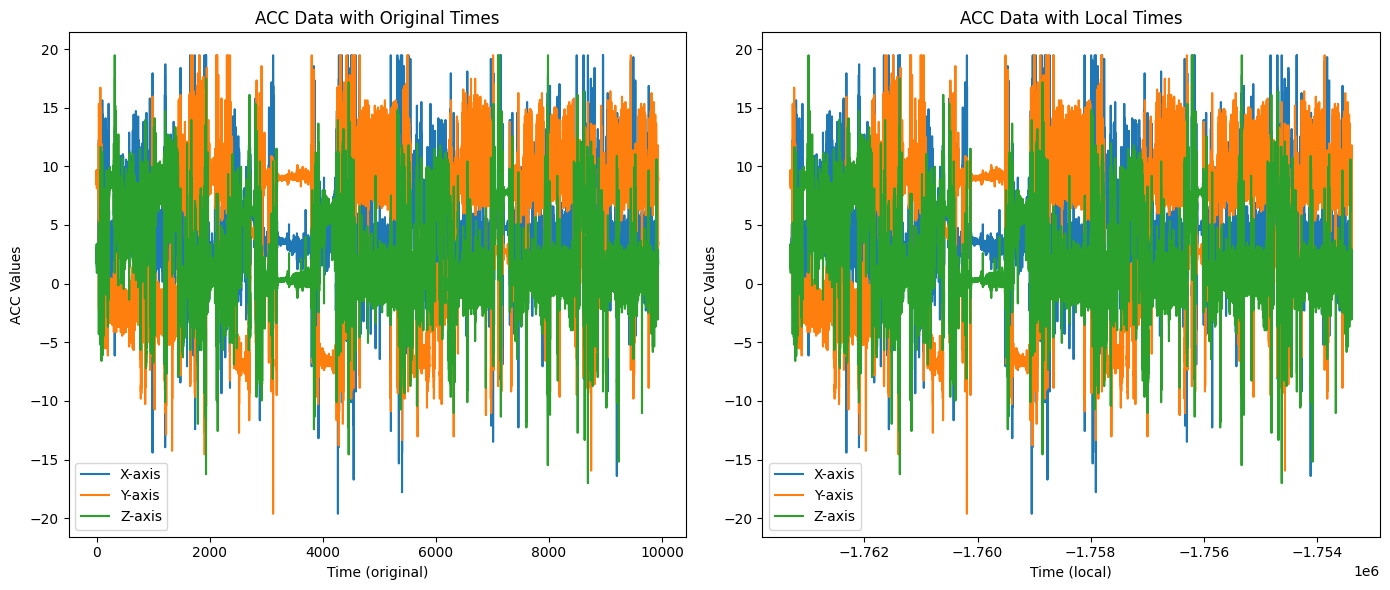

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

person_11 = patients[10].acc
person_12 = patients[11].acc


# Assuming a hypothetical local time adjustment (e.g., subtracting a fixed offset)
local_time_adjustment = patients[1].activities[1].start - patients[1].csv_time
print(f"Difference between Local and Start for patient {patients[10].id} {local_time_adjustment}")
person_11['local_t'] = person_11['t'] - local_time_adjustment

# Plotting the original times
plt.figure(figsize=(14, 6))

# Original times plot
plt.subplot(1, 2, 1)
plt.plot(person_11['t'], person_11['x'], label='X-axis')
plt.plot(person_11['t'], person_11['y'], label='Y-axis')
plt.plot(person_11['t'], person_11['z'], label='Z-axis')
plt.title('ACC Data with Original Times')
plt.xlabel('Time (original)')
plt.ylabel('ACC Values')
plt.legend()

# Local times plot
plt.subplot(1, 2, 2)
plt.plot(person_11['local_t'], person_11['x'], label='X-axis')
plt.plot(person_11['local_t'], person_11['y'], label='Y-axis')
plt.plot(person_11['local_t'], person_11['z'], label='Z-axis')
plt.title('ACC Data with Local Times')
plt.xlabel('Time (local)')
plt.ylabel('ACC Values')
plt.legend()

plt.tight_layout()
plt.show()
plt.show()

In [203]:
def plot_sbs(person):
    plt.figure(figsize=(10, 6))
    adjustment = person.activities[1].start - person.csv_time
    print(f'Patient {person.id}s Adjustment: {adjustment} seconds')

    # Original times
    plt.plot(person.acc['t'], person.acc['x'], label='X-axis (Original)')
    # plt.plot(person_11['t'], person_11['y'], label='Y-axis (Original)')
    # plt.plot(person_11['t'], person_11['z'], label='Z-axis (Original)')

    # Local times adjusted
    # Adjusting local times for plotting purposes to visually compare on the same x-axis
    # Here, we plot local times but shift the labels to compare directly
    plt.plot(person.acc['t'] - adjustment, person.acc['x'], '--', label='X-axis (Local)', alpha=0.5)
    # plt.plot(person_11['t'] - local_time_adjustment, person_11['y'], '--', label='Y-axis (Local)', alpha=0.5)
    # plt.plot(person_11['t'] - local_time_adjustment, person_11['z'], '--', label='Z-axis (Local)', alpha=0.5)

    plt.title('ACC Data: Original vs. Local Times')
    plt.xlabel('Time (original scale)')
    plt.ylabel('ACC Values')
    plt.legend()
    plt.show()

Patient CHI2021 225s Adjustment: 10109.0


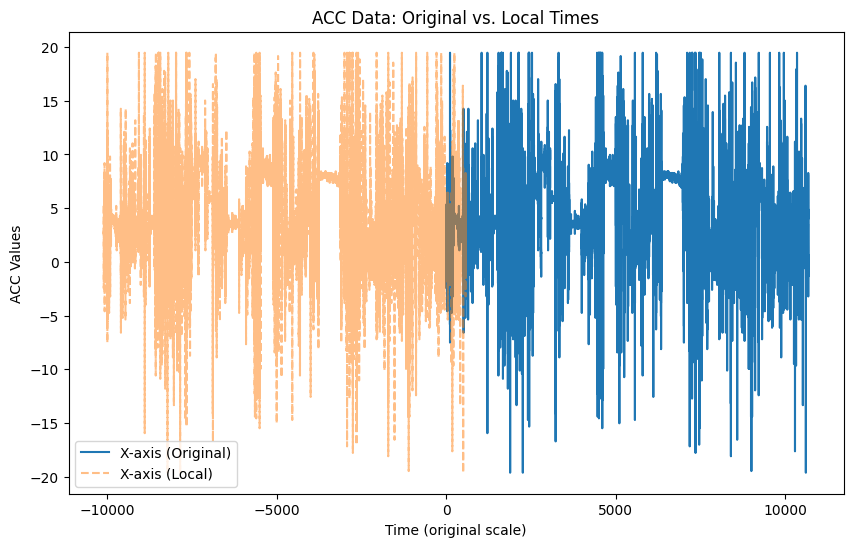

In [202]:
plot_sbs(patients[11])

In [130]:
patients[1].acc

,x,y,z,t
2,3.218906,-2.605781,8.737031,0.00000
3,3.065625,-2.605781,8.583750,0.03125
4,3.065625,-2.605781,8.737031,0.06250
5,2.759063,-2.605781,8.583750,0.09375
6,2.605781,-2.605781,8.737031,0.12500
...,...,...,...,...
401738,3.832031,1.226250,8.430469,12554.25000
401739,3.832031,1.226250,8.583750,12554.28125
401740,3.985313,1.226250,8.583750,12554.31250
401741,3.832031,1.226250,8.583750,12554.34375


In [156]:
patients[10].csv_time

1626890019.0

In [136]:
patients[1].excel_time

1627657259

In [124]:
excel[excel['Subject Index'] == 'CHI2021 223'] 

,Unnamed: 0,Subject Index,Activity,Record Time,Length,bpm,rpm,cal
18,18,CHI2021 223,B2_TWT_A,1629420480,00:02:00,111 bpm,29 rpm,11 Cal
19,19,CHI2021 223,B2_T1,1629420240,00:02:02,108 bpm,31 rpm,10 Cal
20,20,CHI2021 223,B2_TWT_B,1629419941,00:01:59,116 bpm,31 rpm,12 Cal
21,21,CHI2021 223,B2_T2,1629419700,00:01:59,103 bpm,27 rpm,9 Cal
50,50,CHI2021 223,HR Recovery,1628964122,00:31:27,85 bpm,17 rpm,85 Cal
51,51,CHI2021 223,Naughton Test,1628963236,00:13:41,102 bpm,22 rpm,61 Cal
52,52,CHI2021 223,SOT,1628961845,00:10:50,83 bpm,17 rpm,26 Cal
53,53,CHI2021 223,Motor Behavioral Task,1628959927,00:11:56,88 bpm,21 rpm,35 Cal
54,54,CHI2021 223,TMT,1628959683,00:02:02,75 bpm,20 rpm,4 Cal
55,55,CHI2021 223,DSST,1628959447,00:02:59,73 bpm,16 rpm,6 Cal


In [ ]:
## We want to calculate the differencebetween excel and csv or something and then we also only want 20 seconds in between each activity